# 第4章 神经网络的学习

本章的主题是神经网络的学习。这里所说的“学习”是指从训练数据中 自动获取最优权重参数的过程。本章中，为了使神经网络能进行学习，将导 入损失函数这一指标。而学习的目的就是以该损失函数为基准，找出能使它 的值达到最小的权重参数。为了找出尽可能小的损失函数的值，本章我们将 介绍利用了函数斜率的梯度法。


## 4.1 从数据中学习

神经网络的特征就是可以从数据中学习。所谓“从数据中学习”，是指 可以由数据自动决定权重参数的值。这是非常了不起的事情！因为如果所有 的参数都需要人工决定的话，工作量就太大了。在第2章介绍的感知机的例 子中，我们对照着真值表，人工设定了参数的值，但是那时的参数只有3个。 而在实际的神经网络中，参数的数量成千上万，在层数更深的深度学习中， 参数的数量甚至可以上亿，想要人工决定这些参数的值是不可能的。本章将 介绍神经网络的学习，即利用数据决定参数值的方法，并用Python实现对 MNIST手写数字数据集的学习。

### 4.1.1　数据驱动


数据是机器学习的命根子。从数据中寻找答案、从数据中发现模式、根 据数据讲故事……这些机器学习所做的事情，如果没有数据的话，就无从谈 起。因此，数据是机器学习的核心。这种数据驱动的方法，也可以说脱离了 过往以人为中心的方法。 

如果让我们自己来设计一个能将5正确分类的程序，就会意外地发现这 是一个很难的问题。人可以简单地识别出5，但却很难明确说出是基于何种 规律而识别出了5。此外，从图4-1中也可以看到，每个人都有不同的写字习惯， 要发现其中的规律是一件非常难的工作。 

因此，与其绞尽脑汁，从零开始想出一个可以识别5的算法，不如考虑 通过有效利用数据来解决这个问题。一种方案是，先从图像中提取特征再用机器学习技术学习这些特征量的模式。这里所说的“特征量”是指可以 从输入数据（输入图像）中准确地提取本质数据（重要的数据）的转换器。图 像的特征量通常表示为向量的形式。在计算机视觉领域，常用的特征量包括 SIFT、SURF和HOG等。使用这些特征量将图像数据转换为向量，然后对 转换后的向量使用机器学习中的SVM、KNN等分类器进行学习。 量，再用机器学习技术学习这些特征量的模式。这里所说的“特征量”是指可以 从输入数据（输入图像）中准确地提取本质数据（重要的数据）的转换器。图 像的特征量通常表示为向量的形式。在计算机视觉领域，常用的特征量包括 SIFT、SURF和HOG等。使用这些特征量将图像数据转换为向量，然后对 转换后的向量使用机器学习中的SVM、KNN等分类器进行学习。 

深度学习有时也称为端到端机器学习（end-to-end machine  learning）。这里所说的端到端是指从一端到另一端的意思，也就是 从原始数据（输入）中获得目标结果（输出）的意思。


神经网络的优点是对所有的问题都可以用同样的流程来解决。比如，不 管要求解的问题是识别5，还是识别狗，抑或是识别人脸，神经网络都是通 过不断地学习所提供的数据，尝试发现待求解的问题的模式。也就是说，与 待处理的问题无关，神经网络可以将数据直接作为原始数据，进行“端对端” 的学习。


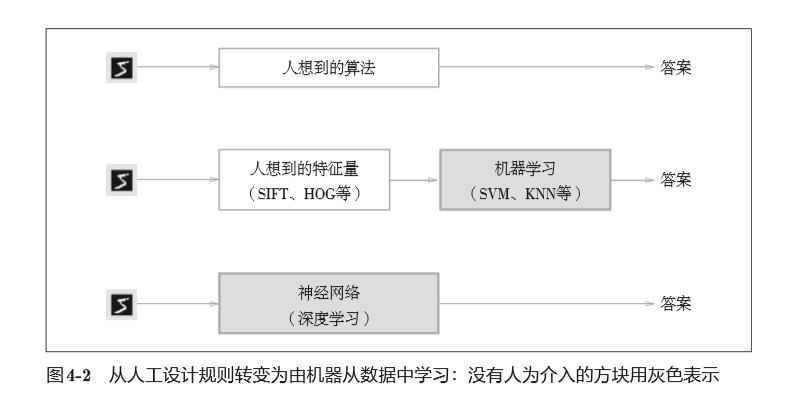

### 4.1.2　训练数据和测试数据


机器学习中，一般将数据分为训练数据和测试数据两部分来进行学习和 实验等。首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试 数据评价训练得到的模型的实际能力。为什么需要将数据分为训练数据和测 试数据呢？因为我们追求的是模型的泛化能力。为了正确评价模型的泛化能 力，就必须划分训练数据和测试数据。另外，训练数据也可以称为监督数据。 

## 4.2 损失函数


均方误差和交叉熵误差

### 4.2.1　均方误差


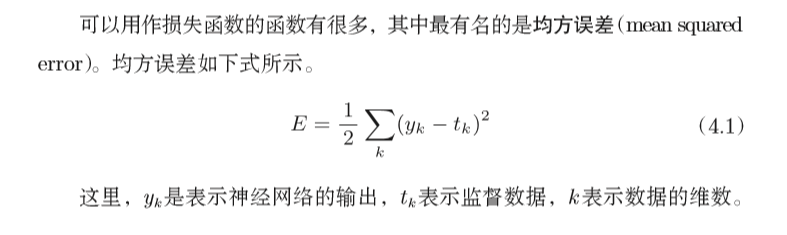

In [7]:
import numpy as np

In [8]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [9]:
# 设“2”为正确解 
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]   

In [10]:
# 例1：“2”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] 

In [12]:
mean_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [13]:
# 例2：“7”的概率最高的情况（0.6） 
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] 
mean_squared_error(np.array(y), np.array(t))

0.5975

这里举了两个例子。第一个例子中，正确解是“2”，神经网络的输出的最大 值是“ 2”；第二个例子中，正确解是“2”，神经网络的输出的最大值是“7”。如 实验结果所示，我们发现第一个例子的损失函数的值更小，和监督数据之间的 误差较小。也就是说，均方误差显示第一个例子的输出结果与监督数据更加吻合。

### 4.2.2　交叉熵误差


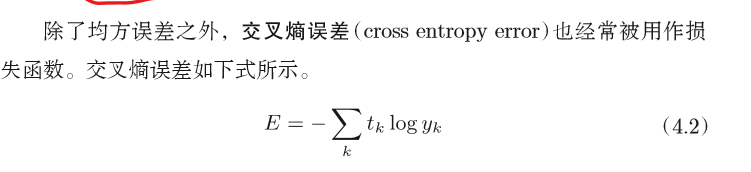

In [14]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

这里，参数y和t是NumPy数组。函数内部在计算np.log时，加上了一 个微小值delta。这是因为，当出现np.log(0)时，np.log(0)会变为负无限大 的-inf，这样一来就会导致后续计算无法进行。作为保护性对策，添加一个 微小值可以防止负无限大的发生。下面，我们使用cross_entropy_error(y, t) 进行一些简单的计算。


In [15]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] 

In [16]:
cross_entropy_error(np.array(y), np.array(t)) 

0.510825457099338

In [17]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] 

In [18]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

第一个例子中，正确解标签对应的输出为0.6，此时的交叉熵误差大约 为0.51。第二个例子中，正确解标签对应的输出为0.1的低值，此时的交叉 熵误差大约为2.3。由此可以看出，这些结果与我们前面讨论的内容是一致的。


### 4.2.3　mini-batch学习


，MNIST数据集的训练数据有60000个，如果以全部数据为对象 求损失函数的和，则计算过程需要花费较长的时间。再者，如果遇到大数据， 数据量会有几百万、几千万之多，这种情况下以全部数据为对象计算损失函 数是不现实的。因此，我们从全部数据中选出一部分，作为全部数据的“近 似”。神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小 批量），然后对每个mini-batch进行学习。比如，从60000个训练数据中随机 选择100笔，再用这100笔数据进行学习。这种学习方式称为mini-batch学习。 

下面我们来编写从训练数据中随机选择指定个数的数据的代码，以进行 mini-batch学习。在这之前，先来看一下用于读入MNIST数据集的代码

In [19]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test) = \
load_mnist(normalize = True,one_hot_label = True)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [20]:
print(x_train.shape)

(60000, 784)


In [21]:
print(t_train.shape)

(60000, 10)


第3章介绍过，load_mnist函数是用于读入MNIST数据集的函数。这个 函数在本书提供的脚本dataset/mnist.py中，它会读入训练数据和测试数据。

读入数据时，通过设定参数one_hot_label=True，可以得到one-hot表示（即 仅正确解标签为1，其余为0的数据结构）。 

读入上面的MNIST数据后，训练数据有60000个，输入数据是784维 （28×28）的图像数据，监督数据是10维的数据。因此，上面的x_train、t_ train的形状分别是(60000, 784)和(60000, 10)。 

那么，如何从这个训练数据中随机抽取10笔数据呢？我们可以使用 NumPy的np.random.choice()，写成如下形式。


In [22]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

使用np.random.choice()可以从指定的数字中随机选择想要的数字。比如， np.random.choice(60000, 10)会从0到59999之间随机选择10个数字。如下 面的实际代码所示，我们可以得到一个包含被选数据的索引的数组。


In [23]:
np.random.choice(6000,10)

array([1754, 5814, 4245, 2591, 4568, 5331, 4271,  891,  836,  308])

之后，我们只需指定这些随机选出的索引，取出mini-batch，然后使用 这个mini-batch计算损失函数即可。


计算电视收视率时，并不会统计所有家庭的电视机，而是仅以那些 被选中的家庭为统计对象。比如，通过从关东地区随机选择1000个 家庭计算收视率，可以近似地求得关东地区整体的收视率。这1000 个家庭的收视率，虽然严格上不等于整体的收视率，但可以作为整 体的一个近似值。和收视率一样，mini-batch的损失函数也是利用 一部分样本数据来近似地计算整体。也就是说，用随机选择的小批 量数据（mini-batch）作为全体训练数据的近似值。

### 4.2.4　mini-batch版交叉熵误差的实现


如何实现对应mini-batch的交叉熵误差呢？只要改良一下之前实现的对 应单个数据的交叉熵误差就可以了。这里，我们来实现一个可以同时处理单 个数据和批量数据（数据作为batch集中输入）两种情况的函数。

In [24]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7)) / batch_size

这里，y是神经网络的输出，t是监督数据。y的维度为1时，即求单个 数据的交叉熵误差时，需要改变数据的形状。并且，当输入为mini-batch时， 要用batch的个数进行正规化，计算单个数据的平均交叉熵误差。 

### 4.2.5　为何要设定损失函数


## 4.3 数值微分


梯度法使用梯度的信息决定前进的方向。本节将介绍梯度是什么、有什 么性质等内容。在这之前，我们先来介绍一下导数。


### 4.3.1　导数


接下来，我们参考式（4.4），来实现求函数的导数的程序。如果直接实 现式（4.4）的话，向h中赋入一个微小值，就可以计算出来了。比如，下面 的实现如何？


In [25]:
def numerical_diff(f,x):
    h = 10e-50
    return (f(x+h) - f(x))/h

函数numerical_diff(f, x)的名称来源于数值微分A 的英文numerical differentiation。这个函数有两个参数，即“函数f”和“传给函数f的参数x”。 乍一看这个实现没有问题，但是实际上这段代码有两处需要改进的地方

在上面的实现中，因为想把尽可能小的值赋给h（可以话，想让h无限 接近0），所以 h使用了10e-50这个微小值。但是，这样反而产生了舍入误差 （rounding error）。所谓舍入误差，是指因省略小数的精细部分的数值（比如， 小数点后第8位以后的数值）而造成最终的计算结果上的误差。比如，在 Python中，舍入误差可如下表示。


In [27]:
np.float32(1e-50)

0.0

如上所示，如果用float32类型（32位的浮点数）来表示1e-50，就会变成 0.0，无法正确表示出来。也就是说，使用过小的值会造成计算机出现计算 上的问题。这是第一个需要改进的地方，即将微小值h改为10−4。使用10−4 就可以得到正确的结果。 

第二个需要改进的地方与函数f的差分有关。虽然上述实现中计算了函 数f在x+h和x之间的差分，但是必须注意到，这个计算从一开始就有误差。 如图4-5所示，“真的导数”对应函数在x处的斜率（称为切线），但上述实现 中计算的导数对应的是(x + h)和x之间的斜率。因此，真的导数（真的切线） 和上述实现中得到的导数的值在严格意义上并不一致。这个差异的出现是因 为h不可能无限接近0。

如图4-5所示，数值微分含有误差。为了减小这个误差，我们可以计算 函数f在(x + h)和(x−h)之间的差分。因为这种计算方法以x为中心，计 算它左右两边的差分，所以也称为中心差分（而 (x + h)和x之间的差分称为 前向差分）。下面，我们基于上述两个要改进的点来实现数值微分（数值梯度）。


In [28]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)

如上所示，利用微小的差分求导数的过程称为数值微分（numerical  differentiation）。而基于数学式的推导求导数的过程，则用“解析 性”（analytic）一词，称为“解析性求解”或者“解析性求导”。比如， y = x2的导数，可以通过 解析性地求解出来。因此，当x = 2时， y的导数为4。解析性求导得到的导数是不含误差的“真的导数”。


### 4.3.2　数值微分的例子


现在我们试着用上述的数值微分对简单函数进行求导。先来看一个由下 式表示的2次函数。


y = 0.01x2 + 0.1x 

In [29]:
def function(x):
    return 0.01*x**2 + 0.1*x

接下来，我们来绘制这个函数的图像。画图所用的代码如下，生成的图 像如图4-6所示。


In [30]:
import numpy as np
import matplotlib.pyplot as plt

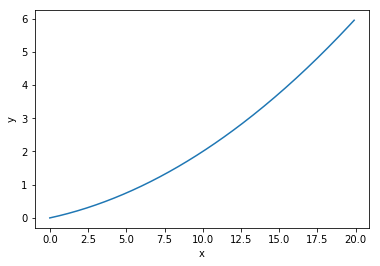

In [31]:
x = np.arange(0.0,20.0,0.1) # 以0.1为单位，从0到20的数组x 
y = function(x)
plt.xlabel("x")
plt.ylabel('y')
plt.plot(x,y)
plt.show()

我们来计算一下这个函数在x = 5和x = 10处的导数。

In [32]:
numerical_diff(function,5)

0.1999999999990898

In [33]:
numerical_diff(function,10)

0.2999999999986347

这里计算的导数是f(x)相对于x的变化量，对应函数的斜率。另外， f(x) = 0.01x2 + 0.1x的解析解是 。因 此，在x = 5和 x = 10处，“真的导数”分别为0.2和0.3。和上面的结果相比，我们发现虽然 严格意义上它们并不一致，但误差非常小。实际上，误差小到基本上可以认 为它们是相等的。 

In [34]:
def tangent_line(f,x):
    d = numerical_diff(f,x)
    print(d)
    y = f(x) - d*x
    return lambda t:d*t +y

In [36]:
tf = tangent_line(function, 5)
y2 = tf(x)

0.1999999999990898


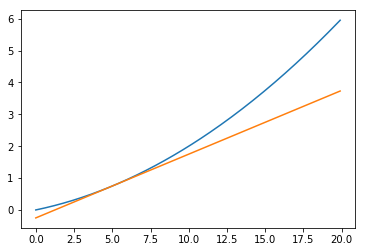

In [37]:
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3　偏导数


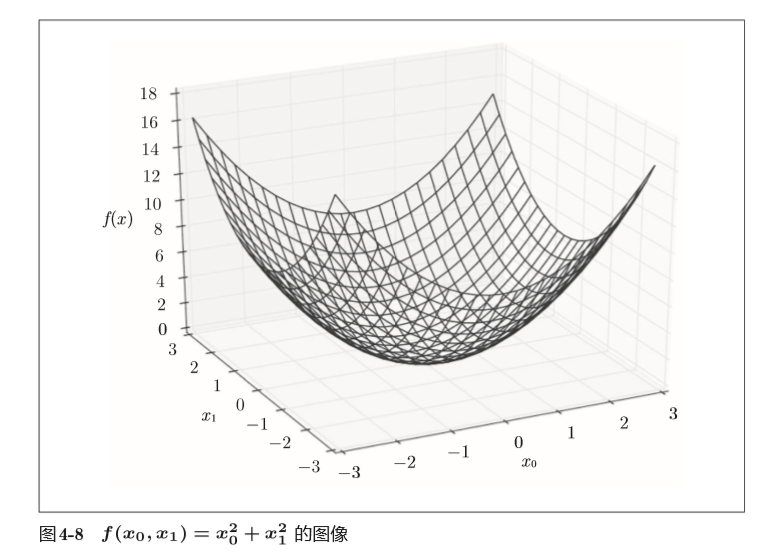

接下来，我们看一下式(4.6)表示的函数。虽然它只是一个计算参数的 平方和的简单函数，但是请注意和上例不同的是，这里有两个变量。 

In [38]:
def function_2(x):
    return x[0]**2+x[1]**2

问题1：求x0 = 3,x 1 = 4时，关于x0的偏导数 

In [40]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [42]:
numerical_diff(function_tmp1,3.0)

6.00000000000378

问题2：求x0 = 3,x 1 = 4时，关于x1的偏导数 

In [48]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [49]:
numerical_diff(function_tmp2,4.0)

7.999999999999119

在这些问题中，我们定义了一个只有一个变量的函数，并对这个函数进 行了求导。例如，问题1中，我们定义了一个固定x1 = 4的新函数，然后对 只有变量x0的函数应用了求数值微分的函数。从上面的计算结果可知，问题 1的答案是6.00000000000378，问题2的答案是7.999999999999119，和解析 解的导数基本一致。 

像这样，偏导数和单变量的导数一样，都是求某个地方的斜率。不过， 偏导数需要将多个变量中的某一个变量定为目标变量，并将其他变量固定为 某个值。在上例的代码中，为了将目标变量以外的变量固定到某些特定的值 上，我们定义了新函数。然后，对新定义的函数应用了之前的求数值微分的 函数，得到偏导数。


## 4.4 梯度


在刚才的例子中，我们按变量分别计算了x0和x1的偏导数。现在，我 们希望一起计算x0和x1的偏导数。比如，我们来考虑求x0 = 3,x 1 = 4时(x0,x 1) 的偏导数 。另外，像 这样的由全部变量的偏导数汇总 而成的向量称为梯度（gradient）。梯度可以像下面这样来实现。

In [51]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        #f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val#还原值
    return grad

函数numerical_gradient(f, x)的实现看上去有些复杂，但它执行的处 理和求单变量的数值微分基本没有区别。需要补充说明一下的是，np.zeros_ like(x)会生成一个形状和x相同、所有元素都为0的数组。 

函数numerical_gradient(f, x)中，参数f为函数，x为NumPy数组，该 函数对NumPy数组x的各个元素求数值微分。现在，我们用这个函数实际 计算一下梯度。这里我们求点(3, 4)、(0,2)、(3,0)处的梯度。


In [58]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [53]:
 numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [54]:
numerical_gradient(function_2, np.array([3.0, 0.0])) 

array([6., 0.])

像这样，我们可以计算(x0,x 1)在各点处的梯度。上例中，点(3,4)处的 梯度是(6,8)，点(0, 2)处的梯度是(0, 4)，点(3,0)处的梯度是(6,0)。这个 梯度意味着什么呢？为了更好地理解，我们把 的梯度画 在图上。不过，这里我们画的是元素值为负梯度B 的向量（

### 4.4.1　梯度法

机器学习的主要任务是在学习时寻找最优参数。同样地，神经网络也必 须在学习时找到最优参数（权重和偏置）。这里所说的最优参数是指损失函数
取最小值时的参数。但是，一般而言，损失函数很复杂，参数空间庞大，我 们不知道它在何处能取得最小值。而通过巧妙地使用梯度来寻找函数最小值 （或者尽可能小的值）的方法就是梯度法。 

这里需要注意的是，梯度表示的是各点处的函数值减小最多的方向。因此， 无法保证梯度所指的方向就是函数的最小值或者真正应该前进的方向。实际 上，在复杂的函数中，梯度指示的方向基本上都不是函数值最小处。


函数的极小值、最小值以及被称为鞍点（saddle point）的地方， 梯度为0。极小值是局部最小值，也就是限定在某个范围内的最 小值。鞍点是从某个方向上看是极大值，从另一个方向上看则是 极小值的点。虽然梯度法是要寻找梯度为0的地方，但是那个地 方不一定就是最小值（也有可能是极小值或者鞍点）。此外，当函 数很复杂且呈扁平状时，学习可能会进入一个（几乎）平坦的地区， 陷入被称为“学习高原”的无法前进的停滞期。


虽然梯度的方向并不一定指向最小值，但沿着它的方向能够最大限度地 减小函数的值。因此，在寻找函数的最小值（或者尽可能小的值）的位置的 任务中，要以梯度的信息为线索，决定前进的方向。 

此时梯度法就派上用场了。在梯度法中，函数的取值从当前位置沿着梯 度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进， 如此反复，不断地沿梯度方向前进。像这样，通过不断地沿梯度方向前进， 逐渐减小函数值的过程就是梯度法（gradient method）。梯度法是解决机器 学习中最优化问题的常用方法，特别是在神经网络的学习中经常被使用。


式（4.7）的 η表示更新量，在神经网络的学习中，称为学习率（learning rate）。学习率决定在一次学习中，应该学习多少，以及在多大程度上更新参数。 

In [70]:
def gradient_descent(f,init_x,lr = 0.01,step_num = 100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f,x)
        x -= lr*grad
        
    return x,np.array(x_history)
        

参数f是要进行最优化的函数，init_x是初始值，lr是学习率learning rate，step_num是梯度法的重复次数。numerical_gradient(f,x)会求函数的 梯度，用该梯度乘以学习率得到的值进行更新操作，由step_num指定重复的 次数

使用这个函数可以求函数的极小值，顺利的话，还可以求函数的最小值。 下面，我们就来尝试解决下面这个问题。


问题：请用梯度法求 的最小值。


In [64]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [65]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x = init_x,lr = 0.1,step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

这里，设初始值为(-3.0, 4.0)，开始使用梯度法寻找最小值。最终的结 果是(-6.1e-10, 8.1e-10)，非常接近(0，0)。实际上，真的最小值就是(0，0)， 所以说通过梯度法我们基本得到了正确结果。如果用图来表示梯度法的更新 过程，则如图4-10所示。可以发现，原点处是最低的地方，函数的取值一 点点在向其靠近。这个图的源代码在ch04/gradient_method.py 中（但 ch04/ gradient_method.py不显示表示等高线的虚线）。


In [71]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

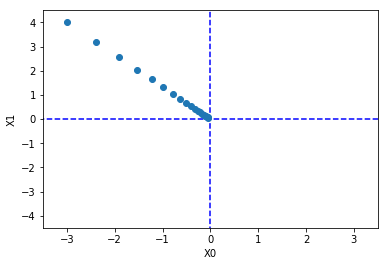

In [72]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

前面说过，学习率过大或者过小都无法得到好的结果。我们来做个实验 验证一下。


In [73]:
# 学习率过大的例子：lr=10.0 
init_x = np.array([-3.0, 4.0]) 
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100) 

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [74]:
# 学习率过小的例子：lr=1e-10 
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100) 

(array([-2.99999994,  3.99999992]), array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.9999

实验结果表明，学习率过大的话，会发散成一个很大的值；反过来，学 习率过小的话，基本上没怎么更新就结束了。也就是说，设定合适的学习率 是一个很重要的问题。


像学习率这样的参数称为超参数。这是一种和神经网络的参数（权重 和偏置）性质不同的参数。相对于神经网络的权重参数是通过训练 数据和学习算法自动获得的，学习率这样的超参数则是人工设定的。 一般来说，超参数需要尝试多个值，以便找到一种可以使学习顺利 进行的设定。


### 4.4.2　神经网络的梯度


下面，我们以一个简单的神经网络为例，来实现求梯度的代码。为此， 我们要实现一个名为simpleNet的类（源代码在ch04/gradient_simplenet.py 中）。


In [75]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax,cross_entropy_error
from common.gradient import numerical_gradient

In [76]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)#利用高斯分布进行初始化
    
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

这里使用了common/functions.py中的softmax和cross_entropy_error方 法，以及common/gradient.py中的numerical_gradient方法。simpleNet类只有 一个实例变量，即形状为2×3的权重参数。它有两个方法，一个是用于预 测的predict(x)，另一个是用于求损失函数值的loss(x,t)。这里参数x接收 输入数据，t接收正确解标签。现在我们来试着用一下这个simpleNet。


In [77]:
net = simpleNet()

In [78]:
print(net.W)

[[ 1.22220423 -2.1791881   2.41727075]
 [ 0.15516256  1.01782958 -0.21539544]]


In [80]:
x = np.array([0.6,0.9])
p = net.predict(x)
p

array([ 0.87296884, -0.39146624,  1.25650655])

In [81]:
np.argmax(p)

2

In [82]:
t = np.array([0,0,1])

In [83]:
net.loss(x,t)

0.6280141657077565

接下来求梯度。和前面一样，我们使用numerical_gradient(f, x)求梯 度（这里定义的函数f(W)的参数W是一个伪参数。因为numerical_gradient(f, x)会在内部执行f(x),为了与之兼容而定义了f(W)）。


In [84]:
def f(W):
    return net.loss(x,t)

In [85]:
dW = numerical_gradient(f,net.W)

In [86]:
dW

array([[ 0.21819244,  0.06161728, -0.27980971],
       [ 0.32728865,  0.09242592, -0.41971457]])

numerical_gradient(f, x) 的参数f是函数，x是传给函数f的参数。因此， 这里参数x取net.W，并定义一个计算损失函数的新函数f，然后把这个新定 义的函数传递给numerical_gradient(f, x)。 

numerical_gradient(f, net.W)的结果是dW，一个形状为2×3的二维数组。 观察一下dW的内容，例如，会发现 中的 的值大约是0.2，这表示如 果将w11增加h，那么损失函数的值会增加0.2h。再如， 对应的值大约 是−0.5，这表示如果将w23增加h，损失函数的值将减小0.5h。因此，从减 小损失函数值的观点来看，w23应向正方向更新，w11应向负方向更新。至于 更新的程度，w23比w11的贡献要大。

另外，在上面的代码中，定义新函数时使用了“def f(x):···”的形式。 实际上，Python中如果定义的是简单的函数，可以使用lambda表示法。使 用lambda的情况下，上述代码可以如下实现。


In [87]:
f = lambda W: net.loss(x,t)

In [89]:
dW = numerical_gradient(f,net.W)
dW

array([[ 0.21819244,  0.06161728, -0.27980971],
       [ 0.32728865,  0.09242592, -0.41971457]])

求出神经网络的梯度后，接下来只需根据梯度法，更新权重参数即可。 在下一节中，我们会以2层神经网络为例，实现整个学习过程。


为了对应形状为多维数组的权重参数W，这里使用的numerical_ gradient()和之前的实现稍有不同。不过，改动只是为了对应多维 数组，所以改动并不大。这里省略了对代码的说明，想知道细节的 读者请参考源代码（common/gradient.py）。


## 4.5 学习算法的实现


关于神经网络学习的基础知识，到这里就全部介绍完了。“损失函 数”“ mini-batch”“梯度”“梯度下降法”等关键词已经陆续登场，这里我们 来确认一下神经网络的学习步骤，顺便复习一下这些内容。神经网络的学习 步骤如下所示。


#### 前提 

神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的 过程称为“学习”。神经网络的学习分成下面4个步骤。


#### 步骤1（mini-batch） 

从训练数据中随机选出一部分数据，这部分数据称为mini-batch。我们 的目标是减小mini-batch的损失函数的值。


#### 步骤2（计算梯度） 

为了减小mini-batch的损失函数的值，需要求出各个权重参数的梯度。 梯度表示损失函数的值减小最多的方向。


#### 步骤3（更新参数） 

将权重参数沿梯度方向进行微小更新。

#### 步骤4（重复） 

重复步骤1、步骤2、步骤3。


神经网络的学习按照上面4个步骤进行。这个方法通过梯度下降法更新 参数，不过因为这里使用的数据是随机选择的mini batch数据，所以又称为 随机梯度下降法（stochastic gradient descent）。“随机”指的是“随机选择的” 的意思，因此，随机梯度下降法是“对随机选择的数据进行的梯度下降法”。 深度学习的很多框架中，随机梯度下降法一般由一个名为SGD的函数来实现。 SGD来源于随机梯度下降法的英文名称的首字母。 

下面，我们来实现手写数字识别的神经网络。这里以2层神经网络（隐 藏层为1层的网络）为对象，使用MNIST数据集进行学习。


### 4.5.1　2层神经网络的类


m首先，我们将这个2层神经网络实现为一个名为TwoLayerNet的类，实现 过程如下所示A 。源代码在ch04/two_layer_net.py中。


In [1]:
import sys,os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [2]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,
                weight_init_std = 0.01):
        #初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std*\
                            np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*\
                            np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        
        return y
    #x:输入数据, t:监督数据 
    def loss(self,x,t):
        y = self.predict(x)
        
        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = no,argmax(y,axis=1)
        t = np.argmax(t,axis = 1)
        
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
     # x:输入数据, t:监督数据 
    def numerical_gradient(self,x,t):
        loss_W = lambda W:self.loss(x,t)
        grads = {}       
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])        
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])        
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])        
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads


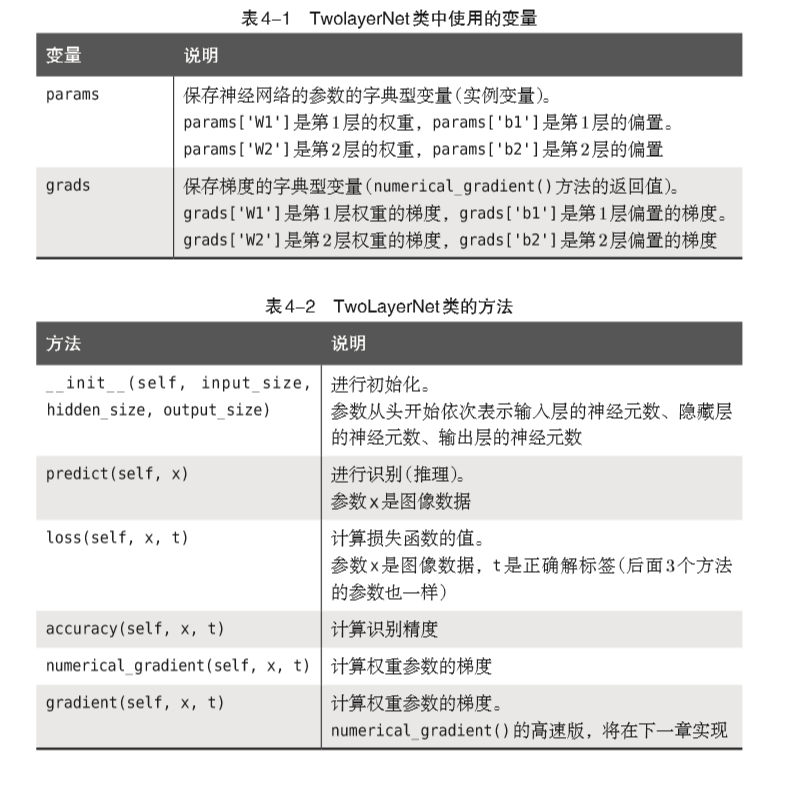

虽然这个类的实现稍微有点长，但是因为和上一章的神经网络的前向处 理的实现有许多共通之处，所以并没有太多新东西。我们先把这个类中用到 的变量和方法整理一下。表4-1中只罗列了重要的变量，表4-2中则罗列了所 有的方法。


TwoLayerNet类有params和grads两个字典型实例变量。params变量中保存 了权重参数，比如params['W1']以NumPy数组的形式保存了第1层的权重参 数。此外，第1层的偏置可以通过param['b1']进行访问。这里来看一个例子。


In [15]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10) 
net.params['W1'].shape # (784, 100) 

(784, 100)

In [16]:
net.params['b1'].shape # (100,)

(100,)

In [17]:
net.params['W2'].shape # (100, 10) 

(100, 10)

In [18]:
net.params['b2'].shape # (10,)

(10,)

如上所示，params变量中保存了该神经网络所需的全部参数。并且， params变量中保存的权重参数会用在推理处理（前向处理）中。顺便说一下， 推理处理的实现如下所示。


In [19]:
x = np.random.rand(100, 784) # 伪输入数据（100笔） 
y = net.predict(x)


此外，与 params变量对应，grads变量中保存了各个参数的梯度。如下所示， 使用numerical_gradient()方法计算梯度后，梯度的信息将保存在grads变 量中。


In [20]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

In [21]:
gards = net.numerical_gradient(x,t)

In [24]:
gards['W1'].shape 

(784, 100)

接着，我们来看一下TwoLayerNet的方法的实现。首先是__init__(self, input_size, hidden_size, output_size)方法，它是类的初始化方法（所谓初 始化方法，就是生成TwoLayerNet实例时被调用的方法）。从第1个参数开始， 依次表示输入层的神经元数、隐藏层的神经元数、输出层的神经元数。另外， 因为进行手写数字识别时，输入图像的大小是784（28×28），输出为10个类别， 所以指定参数input_size=784、output_size=10，将隐藏层的个数hidden_size 设置为一个合适的值即可。 

此外，这个初始化方法会对权重参数进行初始化。如何设置权重参数 的初始值这个问题是关系到神经网络能否成功学习的重要问题。后面我 们会详细讨论权重参数的初始化，这里只需要知道，权重使用符合高斯 分布的随机数进行初始化，偏置使用0进行初始化。predict(self, x)和 accuracy(self, x, t)的实现和上一章的神经网络的推理处理基本一样。如 果仍有不明白的地方，请再回顾一下上一章的内容。另外，loss(self, x, t)是计算损失函数值的方法。这个方法会基于predict()的结果和正确解标签， 计算交叉熵误差。 

剩下的numerical_gradient(self, x, t)方法会计算各个参数的梯度。根 据数值微分，计算各个参数相对于损失函数的梯度。另外，gradient(self, x, t) 是下一章要实现的方法，该方法使用误差反向传播法高效地计算梯度。


numerical_gradient(self, x, t)基于数值微分计算参数的梯度。下 一章，我们会介绍一个高速计算梯度的方法，称为误差反向传播法。 用误差反向传播法求到的梯度和数值微分的结果基本一致，但可以 高速地进行处理。使用误差反向传播法计算梯度的gradient(self, x, t)方法会在下一章实现，不过考虑到神经网络的学习比较花时间， 想节约学习时间的读者可以替换掉这里的numerical_gradient(self, x, t)，抢先使用gradient(self, x, t)！


### 4.5.2　mini-batch的实现


神经网络的学习的实现使用的是前面介绍过的mini-batch学习。所谓 mini-batch学习，就是从训练数据中随机选择一部分数据（称为mini-batch）， 再以这些mini-batch为对象，使用梯度法更新参数的过程。下面，我们就以 TwoLayerNet类为对象，使用MNIST数据集进行学习（源代码在ch04/train_ neuralnet.py中）。


In [3]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [4]:
(x_train,t_train),(x_test,t_test) = load_mnist(normalize = True,one_hot_label = True)

In [5]:
train_loss_list = []

In [6]:
#超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [7]:
network = TwoLayerNet(input_size = 784,hidden_size = 50,output_size = 10)

In [8]:
for i in range(iters_num):
    #获取mini_batch
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #计算梯度
    grad = network.gradient(x_batch,t_batch)
    
    #更新参数
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
        
    #记录学习过程
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

这里，mini-batch的大小为100，需要每次从60000个训练数据中随机 取出100个数据（图像数据和正确解标签数据）。然后，对这个包含100笔数 据的mini-batch求梯度，使用随机梯度下降法（SGD）更新参数。这里，梯 度法的更新次数（循环的次数）为10000。每更新一次，都对训练数据计算损 失函数的值，并把该值添加到数组中。用图像来表示这个损失函数的值的推 移，如图4-11所示

In [20]:
x = np.asarray(train_loss_list)

In [21]:
 y = []
for i in range(iters_num):
    y.append(i)

In [22]:
y = np.asarray(y)

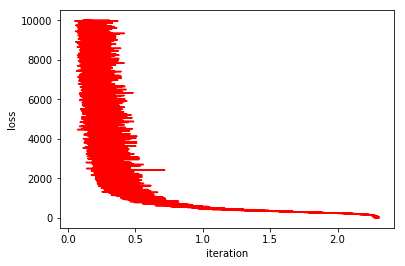

In [24]:
plt.plot(x,y,'r')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

观察图4-11，可以发现随着学习的进行，损失函数的值在不断减小。这 是学习正常进行的信号，表示神经网络的权重参数在逐渐拟合数据。也就是 说，神经网络的确在学习！通过反复地向它浇灌（输入）数据，神经网络正 在逐渐向最优参数靠近。


### 4.5.3　基于测试数据的评价


根据图4-11呈现的结果，我们确认了通过反复学习可以使损失函数的值 逐渐减小这一事实。不过这个损失函数的值，严格地讲是“对训练数据的某 个mini-batch的损失函数”的值。训练数据的损失函数值减小，虽说是神经 网络的学习正常进行的一个信号，但光看这个结果还不能说明该神经网络在 其他数据集上也一定能有同等程度的表现。 

神经网络的学习中，必须确认是否能够正确识别训练数据以外的其他数 据，即确认是否会发生过拟合。过拟合是指，虽然训练数据中的数字图像能 被正确辨别，但是不在训练数据中的数字图像却无法被识别的现象。 

神经网络学习的最初目标是掌握泛化能力，因此，要评价神经网络的泛 化能力，就必须使用不包含在训练数据中的数据。下面的代码在进行学习的 过程中，会定期地对训练数据和测试数据记录识别精度。这里，每经过一个 epoch，我们都会记录下训练数据和测试数据的识别精度。A


epoch是一个单位。一个epoch表示学习中所有训练数据均被使用过 一次时的更新次数。比如，对于10000笔训练数据，用大小为100 笔数据的mini-batch进行学习时，重复随机梯度下降法100次，所 有的训练数据就都被“看过”了A。此时，100次就是一个epoch。


 实际上，一般做法是事先将所有训练数据随机打乱，然后按指定的批次大小，按序生成mini-batch。 这样每个mini-batch均有一个索引号，比如此例可以是0,1,2,...,99，然后用索引号可以遍历所有 的mini-batch。遍历一次所有数据，就称为一个epoch。请注意，本节中的mini-batch每次都是随机 选择的，所以不一定每个数据都会被看到。

In [26]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train,t_train),(x_test,t_test) = load_mnist(normalize = True,one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
#平均每个epoch的重复次数
iter_per_epoch = max(train_size/batch_size,1)

#超参数
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size = 784,hidden_size = 50,output_size = 10)

for i in range(iters_num):
     # 获取mini-batch 
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #计算梯度
    grad = network.gradient(x_batch,t_batch)
    
    #更新参数
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
    
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    # 计算每个epoch的识别精度
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc,test acc |' + str(train_acc)+','+str(test_acc))

train acc,test acc |0.11236666666666667,0.1135
train acc,test acc |0.79855,0.8034
train acc,test acc |0.8777,0.8813
train acc,test acc |0.8987166666666667,0.9023
train acc,test acc |0.9084,0.9106
train acc,test acc |0.9140833333333334,0.9181
train acc,test acc |0.9199166666666667,0.9221
train acc,test acc |0.9236166666666666,0.9267
train acc,test acc |0.9271833333333334,0.929
train acc,test acc |0.9316,0.9335
train acc,test acc |0.9339333333333333,0.9348
train acc,test acc |0.9366666666666666,0.9375
train acc,test acc |0.9395,0.9403
train acc,test acc |0.9414,0.9418
train acc,test acc |0.9433333333333334,0.9433
train acc,test acc |0.94535,0.9452
train acc,test acc |0.94715,0.9457


## 4.6 小结

本章中，我们介绍了神经网络的学习。首先，为了能顺利进行神经网络 的学习，我们导入了损失函数这个指标。以这个损失函数为基准，找出使它的值达到最小的权重参数，就是神经网络学习的目标。为了找到尽可能小的 损失函数值，我们介绍了使用函数斜率的梯度法。


# 本章所学的内容 

• 机器学习中使用的数据集分为训练数据和测试数据。 

•  神经网络用训练数据进行学习，并用测试数据评价学习到的模型的 泛化能力。 

•  神经网络的学习以损失函数为指标，更新权重参数，以使损失函数 的值减小。 

• 利用某个给定的微小值的差分求导数的过程，称为数值微分。 

• 利用数值微分，可以计算权重参数的梯度。 

•  数值微分虽然费时间，但是实现起来很简单。下一章中要实现的稍 微复杂一些的误差反向传播法可以高速地计算梯度。